# 1. Plot Spectra #

Let's start by importing the spectroscopic data you collected for the blacklight, flash light, laser pointer, and blackbody source. In the code block below:
* Import your experimental spectra from the respective csv files
* Plot the data in a single MatPlotlib window
* Add a legend to indicate which spectrum is which 
* Label your x and y axes. (Use correct units for the x axis. You can label the y-axis as "Raw Counts".

You'll compare these spectra in the discussion questions below. 

In [ ]:
# Insert your plotting code here. 

# Correct your spectra for detector effects #

The "Raw Counts" in the spectra you just plotted correspond roughly to the number of photons of each wavelength detected by the CCD camera inside the Vernier spectrometer. The number of photons *detected* by the CCD, however, doesn't necessarily correspond to the number of photons *emitted* by your sample. To get an accurate estimate of $h$ and $k_B$, we'll need to correct for two "flavors" of error in the experimental data. 


## Baseline Offset ##

The first type of error we'll correct for is a static offset in the spectrum that results from the fact that the CCD camera gives some signal even when no light is hitting the detector. In principle, these errors should already be accounted for by the Vernier spectrometer, but you'll probably notice in your data that the signal does not *quite* decay to zero on the short-wavelength (high-frequency) side. To correct for this, we'll subtract from the curve the average value of the signal at wavelengths *less* than 300 nm. If you store your experimental blackbody spectrum in a NumPy array called ``bb`` (for "blackbody"), 

``bb = np.loadtxt('blackbody.csv', delimiter=',')``

you can accomplish this "baseline correction" in a single line via the code

``bb[:,1] -= np.sum(bb[:,1]*(bb[:,0]<300)) / np.sum((bb[:,0]<300))``.

The syntax ``bb[:,1] -=`` indicates that the quantity coming up should be subtracted from ``bb[:,1]``. The quantity to be subtracted is the ratio of ``np.sum(bb[:,1]*(bb[:,0]<300))`` (the sum of all data points whose x-value is less than 300) to ``np.sum((bb[:,0]<300))`` (the total number of data points whose x-value is less than 300). 


## Detector Responsiveness ##

The second artifact we have to correct for is that CCD cameras are more sensitive to photons in the middle of the visible spectrum than they are to photons at the edge. So if the camera detects 90% of the photons at 650 nm, it might only capture 20% of the photons at 800 nm or 500 nm. 

To get accurate spectra, we thus need to correct our experimentally measured curves for the responsiveness of the detector. The plot below shows the approximate response efficiency of the actual CCD camera used in the Vernier spectrometer. (Measured for you ahead of time.) The response-corrected spectrum can be calcualted as $$ S_{corr}(\lambda) = \frac{S_{raw}(\lambda)}{R(\lambda)}, $$
where $R(\lambda)$ is the response curve plotted below. 

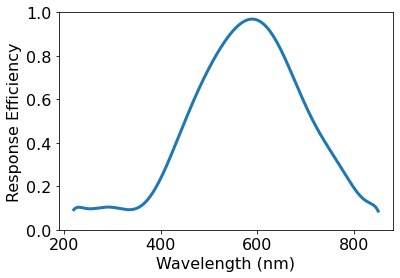


## Instructions ##

In the code cell below, 
1. Load your experimental blackbody spectrum and baseline correct it by subtracting off the mean value of the signal below 300 nm. (You can directly use the syntax quoted above.) 
2. Load the response curve from the file "response.txt" (automatically included for you with this notebook). 
3. Calculate the "response-corrected" blackbody spectrum by dividing your experimental spectrum by the response curve. 

Note how the shape of the curve changes based on the response curve. At wavelengths where the detector is not very responsive (the response curve is small), does the response correction increase or decrease the signal compared to the raw data? Why does this happen? 

In [ ]:
# Insert your code here

# 3. Estimate the ratio $\frac{h}{k_B}$ #

We're finally ready to estimate $\frac{h}{k_B}$. In the next section, you'll use the SciPy optimize package to fit your data automatically. But you'll quickly learn that success in numerical fitting often depends strongly on having a good initial guess. So let's see if we can get a rough guess for the *approximate* value of the ratio $\frac{h}{k_B}$ before we do any numerical fitting. 

To do this, take a look again at the Blackbody radiation formula, expressed as a function of wavelength: 

$$\rho(\lambda) = \frac{2hc^2}{\lambda^5} \frac{1}{ e^{\frac{hc}{\lambda k_B T} } - 1} . $$

Due to the wavelength range of our UV/Vis spectrometers, we can't see much of the infrared part of the spectrum (wavelengths longer than 800 nm). But we can easily see the wavelength range where the signal drops to zero on the short wavelength (high-frequency) side. Roughly speaking, this will happen when the exponent factor $\frac{hc}{\lambda k_B T}$ in the denominator of the blackbody expression becomes larger than 1, so that the exponential $e^{\frac{hc}{\lambda k_B T}}$ begins to rapidly increase, sending the denominator toward infinity and the expression as a whole toward zero. 

Mathematically, this happens at the wavelength $\lambda_0$ where

$$ \frac{h c}{\lambda_0 k_B T} \approx 1 $$
or 
$$ \frac{h}{k_B} \approx \frac{\lambda_0 T}{c} .$$

In the code block below, use this expression to estimate the value of the ratio $\frac{h}{k_B}$, referring back to your response-corrected blackbody curve to estimate the wavelength $\lambda_0$ where the blackbody spectrum approaches zero. For concreteness, you could set $\lambda_0$ to be the wavelength at which the experimental curve drops to less than 10% of its maximum value. 

Write your code so that your estimate of the ratio $\frac{h}{k_B}$ is stored as a variable named ``hkEstimate`` and add the line 

``print(hkEstimate)`` 

to print the result to the screen. 

In [ ]:
# Enter your code here #

## Fit your data to determine $\frac{h}{k_B}$ ##

Now that we have a rough estimate for $\frac{h}{k_B}$, let's get a more accurate value by using the SciPy.Optimize toolbox to fit the data numerically. The Optimize tookbox is very powerful, but its syntax can be a little confusing, so we'll walk through this together. Essentially, there are three steps: 

0. **Import scipy.optimize**. Use ``from scipy import optimize``. 'Nuff said. 

1. **Define the function to which you wish to fit your data.** The function should be definined with a specific form: 
    * The first argument should be the x-axis at which it should be evaluated. 
    * The remaining arguments should be parameters to be optimized. 
    
    In our case, there is only one optimization parameter, so we can use the syntax ``def blackbody(xvals, hk):`` to define our fit function. ``xvals`` will be the x-axis vector denoting wavelength, while ``hk`` will represent the ratio $\frac{h}{k_B}$ to be optimized. 

2. **Call ``optimize.curve_fit`` with the following arguments:**
    * 1st argument: The fit function, in this case ``blackbody``, *without arguments*. The arguments will be added by scipy.optimize during the fitting procedure. 
    * 2nd argument: x-axis values. In our case, we'll pass the wavelength axis from our data ``bb[:,0]``. 
    * 3rd argument: y-values to fit against. This is our experimental blackbody spectrum, stored in the array ``bb[:,1]``. 
    * 4th argument: Initial guess for fit parameters, as a Python list. In our case, there's only one parameter, so we'll pass a list containing only our estimated value ``[hkEstimate]`` for $\frac{h}{k_B}$. 
    * Optional argument: Upper and lower limits for fit parameters. This isn't required, but it often helps to keep the fitting procedure from going off the rails, especially in situations where there is more than one argument to fit. In this case, bounds are useful to prevent numerical overflow errors in the ``np.exp()`` call that defines the blackbody curve. (Numbers like $e^{1000}$ are very, very big and tend to produce numerical errors.) Here we'll just set the error bounds to 100 times larger and 100 times smaller than our initial estimate using the syntax ``bounds=(hkEstimate*0.01,hkEstimate*100)``. Note the ``bounds=`` is required here because ``bounds`` is an optional argument and otherwise scipy.optimize won't be sure *which* optional argument this is. (There are others.)
    
Altogether, we get the following syntax: 

``pars, parcov = optimize.curve_fit(blackbody, bb[:,0], bb[:,1], [hkEstimate], bounds=(hkEstimate*0.01,hkEstimate*100))``

where the output parameters ``pars`` and ``parcov`` are, respectively, a list of best-fit parameters and an estimated covariance matrix indicating the uncertainty associated with the fit. More specifically, the square root of the diagonal elements of ``parcov`` gives the one standard deviation error for each fit parameter. Note that this covarience estimate captures only the uncertainty due to *noise* in the data (i.e., random fluctuations around the true value). It does *not* reflect systematic errors that may also be present, e.g., due to a miscalibrated source or detector. 

The code block below is set up to fit your baseline-corrected blackbody data, stored in an array called ``bb``. Note that before the fitting procedure starts, ``bb[:,1]`` is normalized to have a sum of exactly 1. The ``blackbody()`` function does the same with its output data. This avoids the need to fit the amplitude of our data (which doesn't mean much in our measurement), so that the optimization can focus exclusively on the shape of the curve. 

Use the code block below to:
1. Fit your blackbody curve
2. Print the best-estimate of $\frac{h}{k_B}$ -- with units!
3. Print the estimated error in the fit (also with units!). 
4. Plot both the experimental data and the best-fit curve by evaluating the blackbody() function using your best-fit parameters. 

Be sure to use correct axis labels and include a legend to show which curve is which. 

In [ ]:
from scipy import optimize

# The first argument should be the x-axis
# The second argument is h/k, which will be optimized. 
def blackbody(xvals, hk):
    
    T = 2796.0     # Lamp Temperature in K
    c = (2.9979e+8)*(1e+9) # speed of light in nm/sec
    
    # This is the generic form for a Blackbody radiator at temperature T
    yvals = 1.0/((np.exp(c*hk/(xvals*T)) - 1.0)*((xvals)**5))
    
    # Since we're only fitting the shape (not the absolute intensity), we
    # normalize by dividing by the sum of all data points (which is 
    # proportional to the area under the curve.)
    yvals /= np.sum(yvals)
    return yvals

bb[:,1] /= np.sum(bb[:,1])
pars, parcov = optimize.curve_fit(blackbody, bb[:,0], bb[:,1], [hkEstimate], bounds=(hkEstimate*0.01,hkEstimate*100))

# Questions #

## 1. Light sources ##

<span style="color:red">Referring back to your plot of the light sources from the laser pointer: Do you think any of these sources are blackbody emitters? How can you tell? Why does Kirchhoff's theorem not apply to them? </span>




## 2. Detector Response Correction ##

<span style="color:red">Referrring back to your correction for the detector respone: at wavelengths where the detector is not very responsive (the response curve is small), does the response correction increase or decrease the signal compared to the raw data? Why does this happen?</span>


## 3. $\frac{h}{k_B}$ estimate ##


<span style="color:red">How close was your estimate of $\frac{h}{k_B}$ to the true value? How does this compare to the reported one-standard-deviation error from scipy.optimize? What do you think determines the error in this experiment? </span>


## 4. Estimate $h$ and $k_B$ individually ##

Your experimental measurement provides an estimate for the ratio $\frac{h}{k_B}$, but to get these two terms *separately* we need a measurement of the total power of a blackbody source with a known surface area. (At a given temperature, large objects emit more light than smaller objects, so it's important that we know the area accurately.) Since we don't know the total surface area of the ThorLabs blackbody emitter, we can't use this to estimate $h$ and $k_B$ directly. 

Fortunately, there's an easy way to get a back-of-the-envelope estimate for these factors without doing any more measurements. The sun closely approximates a blackbody source with the following parameters:
* Radius: 6.96$\cdot 10^8$ m
* Temperature: 5700 K
* Distance from the earth: 1.50$\cdot 10^{11}$ m. 
* Intensity of light hitting the earth: 1361 J/(m$^2 \cdot $ s).

If one integrates Planck's blackbody radiation law over all frequencies, orientations, and the total surface area of the emitter, we obtain a formula (the *Stefan-Boltzmann Law*) for the total power emitted by the sun:
$$ P_{sun} = \frac{8 \pi^6 (k_B T)^4}{15 c^2 h^3} R_{sun}^2 = \frac{8 \pi^6 T^4}{15 c^2 \left( \frac{h}{k_B} \right)^3} \cdot R_{sun}^2 \cdot k_B . $$

Note that in the second equality, we have grouped the three factors of $h$ together with three of the four factors of $k_B$ into the ratio $\frac{h}{k_B}$ that you just estimated. A lone factor of $k_B$ remains on the right-hand side. If we can calculate the total power of light emitted by the sun, we can thus calculate $k_B$ directly:

$$ k_B = \frac{P_{sun}}{\frac{8 \pi^6 T^4}{15 c^2 \left( \frac{h}{k_B} \right)^3} \cdot R_{sun}^2}$$

This might sound hard (how do you get a detector around the entire sun?), but it's actually quite easy. All we really have to do is measure the intensity of sunlight striking a detector on earth (1.5$\cdot 10^{11}$ m away from the sun) and then calculate how much of the total light emitted by the sun is striking that detector. (Hint: this is a very small number!) More precisely, a 1 m$^2$ detector on earth represents 

$$ f = \frac{1 m^2}{4\pi\cdot (1.5\cdot 10^{11} m)^2} = 3.54\cdot 10^{-24}$$

of the total power emitted by the sun. (The denominator here is the surface area of a sphere with $1.5\cdot 10^{11}$ m, the distance from the earth to the sun.) The sun's total power is thus (approximately)

$$ P_{sun} = \frac{1361 J/(m^2\cdot s) }{3.54\cdot10^{-24}} = 3.85 \cdot 10^{26} J/(m^2\cdot s) .$$

<span style="color:red">Use this result together with the formula above for $k_B$ in terms of $R_{sun}$ and your experimentally determined value of $\frac{h}{k_B}$ to estimate the absolute value of $k_B$. Put your numerical calculations in the code block below, and then discuss in the Markdown box that follows:</span>
* <span style="color:red">How close you get to the real value for $k_B$? </span>
* <span style="color:red">What estimate do you get for $h$ you get by combining your estimates of $\frac{h}{k_B}$ and $k_B$? </span>

In [ ]:
# Enter your code here #

## Estimating Avogadro's number ##

<span style="color:red">Finally, use the relationship $$R = N_A k_B$$ between the ideal gas constant $R$, Avogadro's number $N_A$, and the Boltzmann constant $k_B$ to estimate Avogadro's number. How close do you come to the true value? </span>

In [ ]:
# Enter your code here #